# **Laboratorio 8**

In [1]:
# IMPORTAMOS LIBRERÍAS

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_moons, make_circles, make_blobs # Descargamos los datasets
from sklearn.svm import SVC # Para construir el clasificador
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# Creamos un diccionario con los datasets
datasets = {
    "make_moons": make_moons(n_samples=300, noise=0.2, random_state=42),
    "make_circles": make_circles(n_samples=300, noise=0.2, factor=0.5, random_state=42),
    "make_blobs": make_blobs(n_samples=300, centers=2, cluster_std=1.5, random_state=42)
}

# Creamos el diccionario con los parámetros para el SearchGrid
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": ["scale", "auto", 0.1, 1],
    "kernel": ["rbf", "poly", "sigmoid", "linear"]
}

## **1. Implementar un SVM para clasificar los siguientes datasets: make_moons, make_circles y make_blobs, para ello se deberá crear un grid search**

In [3]:
# Creamos una función que se encarga de realizar el GridSearch y la clasificación

def search_train(name, X, y):
    # Split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # GridSearch
    grid = GridSearchCV(SVC(), param_grid, cv=5)
    grid.fit(X_train, y_train)
    best_clf = grid.best_estimator_
    print(f"\nMejores parámetros para {name}: {grid.best_params_}")

    return X_train, X_test, y_train, y_test, best_clf


## **2. Con los mejores párametros dibujar  las fronteras de clasificación**

In [4]:
# Creamos una función que crea y dibuja las fronteras de decisión

def make_contour(name, best_clf, X, y):
    h = 0.02  # Tamaño del paso en la malla
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = best_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.contourf(xx, yy, Z, alpha=0.3, levels=[-1, 0, 1], colors=["blue", "red"])
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors="k", cmap=plt.cm.bwr)
    plt.title(f"Frontera de decisión - {name}")

## **3. Con los mejores parámetros dibujar la matriz de confusion**

In [5]:
# Creamos una función que se encarga de obtener y graficar la matriz de confusión

def confusion_matrix(name, best_clf, X_test, y_test):

    plt.subplot(1, 2, 2)
    disp = ConfusionMatrixDisplay.from_estimator(best_clf, X_test, y_test, cmap=plt.cm.Blues, ax=plt.gca())
    plt.title(f"Matriz de confusión - {name}")

    plt.tight_layout()
    plt.show()

## **Finalmente, realizamos la búsqueda y clasificación para cada dataset**


Mejores parámetros para make_moons: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


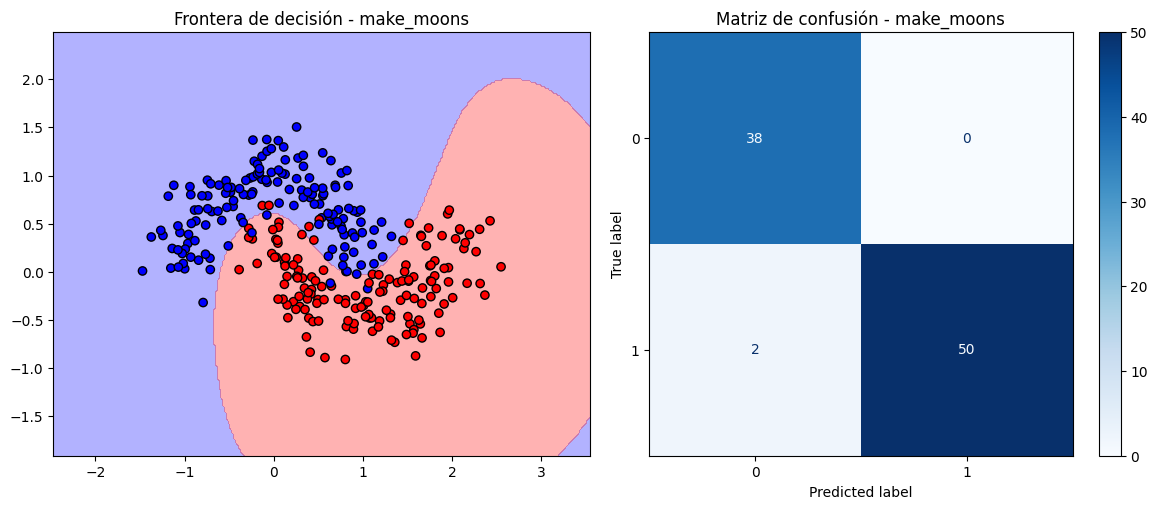


Mejores parámetros para make_circles: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


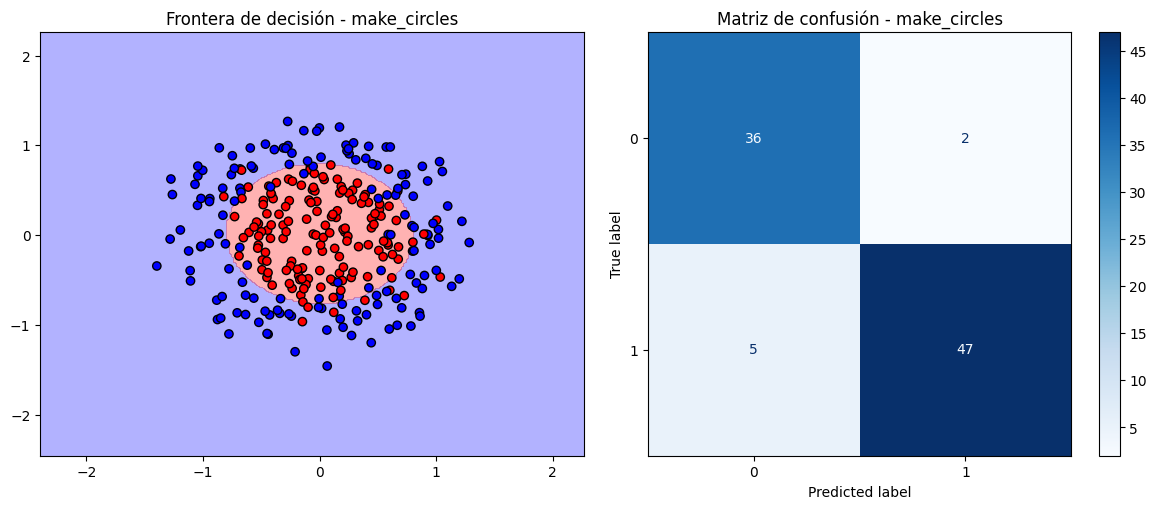


Mejores parámetros para make_blobs: {'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}


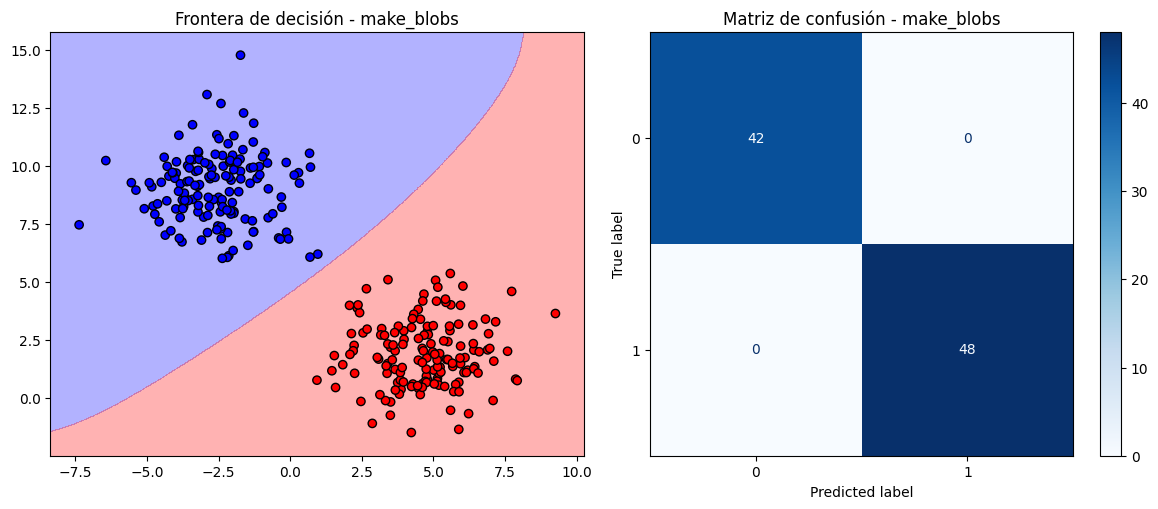

In [6]:
# Ejecutamos en todos los datasets

for name, (X, y) in datasets.items():
    X_train, X_test, y_train, y_test, best_clf = search_train(name, X, y)
    make_contour(name, best_clf, X, y)
    confusion_matrix(name, best_clf, X_test, y_test)